In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
import pickle
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm
from astropy.io import fits
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="ticks", palette="colorblind", color_codes=True)

from MaStarChecks.constants import STELLAR_LIBRARIES_PATH, HOMOGENEOUS_DATA_PATH, NAN_PLACEHOLDER
from MaStarChecks.constants import INDOUS_FWHM, MILES_FWHM, MASTAR_FHWM
from MaStarChecks.preprocessing import clean_seds, downgrade_resolution
from MaStarChecks.stellarLibraries.catalogues import build_indous_catalogue, build_miles_catalogue, build_mastar_catalogue, extract_catalogue
from MaStarChecks.stellarLibraries.spectra import build_indous_library, build_miles_library, build_mastar_library, extract_spectra
from MaStarChecks.plotting.styles import *


STELLAR_LIBRARIES_PATH = os.path.abspath("../fitting/_data")
HOMOGENEOUS_DATA_PATH = os.path.join(STELLAR_LIBRARIES_PATH, "homogeneous")
PROCESSED_PATH = os.path.join(STELLAR_LIBRARIES_PATH, "processed-libraries-v3.1.1")

In [2]:
sed_list = sorted([filename for filename in os.listdir(PROCESSED_PATH) if filename.startswith("processed") and filename.endswith(".fits.gz") and "mastar" in filename])
weird_index = pd.read_pickle("../analysis/_cache/weird-stars.p")

sed_list_weird = ("processed-mastar-"+weird_index.ID+"-"+weird_index.RECORD.astype(str)+".fits.gz").to_list()

(3465.0, 9469.0, '2021-05-31T14:14:22.272981')

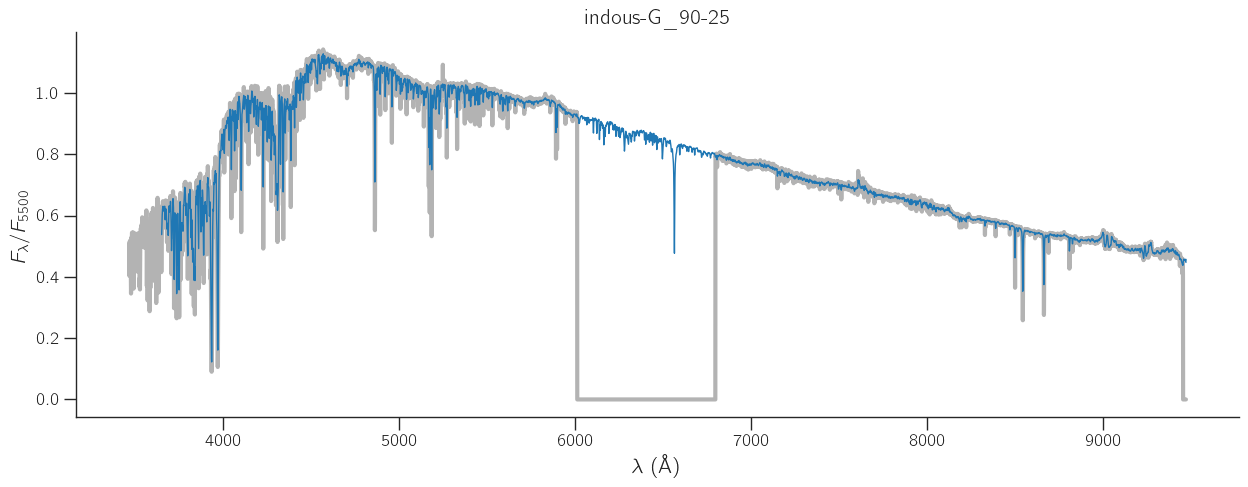

In [8]:
winner_sed = np.random.choice(sed_list)

winner_sed = "processed-indous-G_90-25.fits.gz"
# winner_sed = "processed-indous-10476.fits.gz"

raw = fits.open(os.path.join(HOMOGENEOUS_DATA_PATH,winner_sed.replace("processed-","")))
pro = fits.open(os.path.join(PROCESSED_PATH,winner_sed))

fig = plt.figure(figsize=(15,5))

plt.title(os.path.basename(winner_sed).replace("processed-","").replace(".fits.gz",""))
plt.plot(raw[1].data["WAVELENGTH"], raw[1].data["FLUX"] / pro[0].header["FNORM"], "-", color="0.7", lw=3, label="raw")
plt.plot(pro[1].data["WAVELENGTH"], pro[1].data["FLUX"], "-", color="tab:blue", lw=1, label="processed")
# plt.legend(loc=2, frameon=False)
plt.xlabel(r"$\lambda$ (\AA)")
plt.ylabel(r"$F_\lambda/F_{5500}$")

sns.despine()
(
    raw[1].data["WAVELENGTH"].min(), raw[1].data["WAVELENGTH"].max(),
    datetime.isoformat(datetime.fromtimestamp(os.path.getmtime(os.path.join(PROCESSED_PATH,winner_sed))))
)